In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [2]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [12]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
  images =[]
  labels = []
  with open(filename) as training_file:
    # Your code starts here
    csv_file = csv.reader(training_file)
    for i,row in enumerate(csv_file):
      if(i==0):
        continue
      labels.append(row[0])
      image_data = np.array_split(row[1:785], 28)
      images.append(image_data)
    images = np.array(images).astype('float')
    labels = np.array(labels).astype('float')
  return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [13]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3) # Your Code Here
testing_images = np.expand_dims(testing_images, axis=3)# Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
    rescale = 1.0/255.,
    rotation_range = 40,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
    )

validation_datagen = ImageDataGenerator(
    # Your Code Here
    rescale = 1.0/255.
)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [14]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(optimizer =tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics = ['acc'])# Your Code Here)

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch = len(training_images)/32,
                              epochs = 15,
                              validation_data = validation_datagen.flow(testing_images, testing_labels, batch_size=64),
                              validation_steps = len(testing_images)/32)# Your Code Here)

testing_images = testing_images/255.0

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
#[6.92426086682151, 0.56609035]


Epoch 1/15
858/857 [==============================] - 10s 11ms/step - loss: 2.8080 - acc: 0.1492 - val_loss: 1.9993 - val_acc: 0.3647
Epoch 2/15
858/857 [==============================] - 9s 11ms/step - loss: 2.0654 - acc: 0.3502 - val_loss: 1.4205 - val_acc: 0.4966
Epoch 3/15
858/857 [==============================] - 9s 11ms/step - loss: 1.6805 - acc: 0.4664 - val_loss: 1.0812 - val_acc: 0.6449
Epoch 4/15
858/857 [==============================] - 9s 11ms/step - loss: 1.4488 - acc: 0.5254 - val_loss: 0.8527 - val_acc: 0.7037
Epoch 5/15
858/857 [==============================] - 9s 11ms/step - loss: 1.2961 - acc: 0.5808 - val_loss: 0.7508 - val_acc: 0.7323
Epoch 6/15
858/857 [==============================] - 9s 11ms/step - loss: 1.1617 - acc: 0.6187 - val_loss: 0.7119 - val_acc: 0.7400
Epoch 7/15
858/857 [==============================] - 9s 11ms/step - loss: 1.0654 - acc: 0.6499 - val_loss: 0.6771 - val_acc: 0.7700
Epoch 8/15
858/857 [==============================] - 9s 11ms/step -

[0.3656782642862881, 0.88413274]

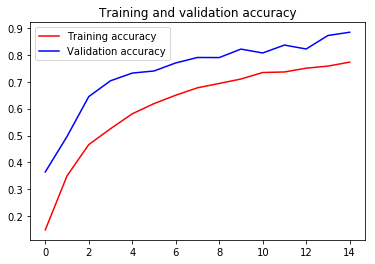

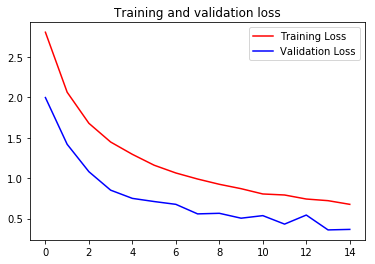

In [15]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['acc']# Your Code Here
val_acc =history.history['val_acc'] # Your Code Here
loss = history.history['loss'] # Your Code Here
val_loss = history.history['val_loss']# Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()